# Principal Component Analysis

In [60]:
# imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# generate dataset
data = np.random.normal(np.random.rand(2), np.arange(2, 2+2), (1000, 2))



In [51]:
pca_eigvec

array([[ 0.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00, -2.53684179e-32]])

In [71]:
N_COMPONENTS = 1

# calculate covariance
mean  = np.mean(data, axis=0)
cov = np.matmul((data-mean).T, (data-mean))

# calculate eigen values
eigval, eigvec = np.linalg.eig(cov) 

# find biggest eigenvalues, those are the components that we are interested in
eigvals = sorted(enumerate(eigval), key=lambda x: -x[1])

# choose the top N eigenvectors
eigvec_idxs = [x[0] for x in eigvals[:N_COMPONENTS]]
pca_eigvec = eigvec[eigvec_idxs]


# project data
data_projected = np.matmul(data, pca_eigvec.T)

In [72]:
eigval

array([3906.44478348, 9648.42519015])

In [82]:
eigval.reshape(-1,1)

array([[3906.44478348],
       [9648.42519015]])

In [79]:
eigvec_scaled = np.matmul(eigvec, eigval.reshape(-1,1)/1000)

In [ ]:
eig

IndexError: index 1 is out of bounds for axis 1 with size 1

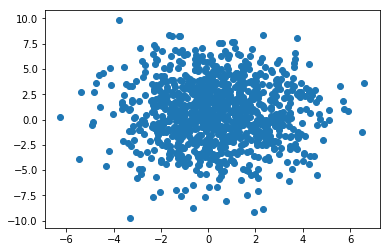

In [83]:
plt.scatter(data[:, 0], data[:, 1])
# plot eigen vectors
plt.quiver(*mean, eigvec_scaled[:, 0], eigvec_scaled[:, 1], color=['r','g'], scale=200)


# Singular Value Decomposition

In [1]:
import numpy as np

In [39]:
# generate dataset
ncols = 10
A = np.random.normal(np.random.rand(ncols), np.arange(2, 2+ncols), (100, ncols))

In [76]:
# check if correct with MSE
N_COMPONENTS = 9

# calculate A = SUV^T

def svd(A):
    
    # calculate eigenvalues and vectors V for AA^TV = V*S^2
    eigvals, V = np.linalg.eig(A.T@A)
    S = np.sqrt(np.diag(eigvals))
    
    # calculate U
    U = A@np.linalg.inv(V.T)@np.linalg.inv(S)
    
    return S, U, V

def test(S, U, V):
    return U@S@V.T
    
def project(A, S, V, n_components=None):
    if n_components is None:
        n_components = len(S)
    idxs = np.diag(S).argsort()[-n_components:]
    idxs.sort()
    A_ = A@np.linalg.pinv(V.T[idxs])@np.linalg.inv(np.diag(S[idxs, idxs]))

    return A_

A_project = project(A, S, V, 3)
A_ = test(S, U, V)
MSE = np.sum(np.square(A-A_))

MSE

2.3020619018734067e-27

In [ ]:
idxs.